In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
sns.set_palette("Set2")

import pandas as pd # library for data analsysis

import json

import requests
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set2")

print("libraries imported")

libraries imported


## Data Wrangling & Cleaning
Data to be sourced for all neighbourhoods in Manchester, UK

In [3]:
url = 'https://simple.wikipedia.org/wiki/M_postcode_area'
dfs = pd.read_html(url)
df = dfs[0]
print(df.shape)
df.head()

(52, 4)


,Postal district,Post town,Coverage,Local authority
0,M1,MANCHESTER,Manchester central,Manchester
1,M2,MANCHESTER,Manchester central,Manchester
2,"M3 (Sectors 1, 2, 3, 4 and 9)",MANCHESTER,Manchester central,Manchester
3,"M3 (Sectors 5, 6 and 7)",SALFORD,Salford Quays,Salford
4,M4,MANCHESTER,Manchester central,Manchester


Noted that M60, M90 and M99 do not refer to neighbourhoods in the city, removed from the dataframe <br>
Post town column is also not required so removed

In [4]:
df.drop(df.index[44:],inplace=True)
df.drop(['Post town'],axis=1,inplace=True)
df.shape

(44, 3)

In [5]:
df.to_csv(index=False)

'Postal district,Coverage,Local authority\r\nM1,Manchester central,Manchester\r\nM2,Manchester central,Manchester\r\n"M3 (Sectors 1, 2, 3, 4 and 9)",Manchester central,Manchester\r\n"M3 (Sectors 5, 6 and 7)",Salford Quays,Salford\r\nM4,Manchester central,Manchester\r\nM5,"Seedley, Weaste",Salford\r\nM6,"Claremont, Irlams O\' Th\' Height",Salford\r\nM7,"Higher Broughton, Cheetwood","Salford, Manchester"\r\nM8,"Crumpsall, Cheetham Hill",Manchester\r\nM9,"Harpurhey, Blackley",Manchester\r\nM10,Newton Heath,Manchester\r\nM11,"Clayton, Openshaw",Manchester\r\nM12,"Ardwick, Longsight",Manchester\r\nM13,Longsight,Manchester\r\nM14,"Fallowfield, Moss Side, Ladybarn, Rusholme",Manchester\r\nM15,"Hulme, Manchester Science Park",Manchester\r\nM16,"Firswood, Moss Side, Old Trafford, Whalley Range","Trafford, Manchester"\r\nM17,"Trafford Park, The Trafford Centre",Trafford\r\nM18,"Abbey Hey, Gorton",Manchester\r\nM19,"Levenshulme, Burnage",Manchester\r\nM20,"Didsbury, Withington",Manchester\r\nM21,

Additional data sourced from available databases online

Geographic co-ordinates sourced as a CSV file from "https://www.freemaptools.com/download-uk-postcode-lat-lng.htm".  This file contains latitude and longitude co-odinates for all UK neighbourhoods seperated by the postcode outcode (this is the first section of UK postcodes).

UK houseprices were sourced from the UK Gov.uk website which lists all house sales in the UK by postcode, found here "https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads".

Further data wrangling was quickly put together using MS Excel.  Initially to ease data processing the two entries for postcode M3 were merged.  The geographic co-ordinates were simply joined onto the end of the df table via vlookup functions.  House prices were first reduced to Manchester only data via the sort and filter function before averaging for house price for each of the Manchester outcodes.  Finally the averaged data was ammended to the df database again using vlookup functions before saving as a csv file titled "man_pc_data_final" shown below.

In [6]:
df_man = pd.read_csv (r'C:\Users\dave_\OneDrive\Documents\Coursera Data Science Course\Capstone Project\My project\man_pc_data_final.csv')


df_man.head()

,Postal district,Neighbourhood,Local authority,Latitude,Longitude,"Average Sold House Price, 000s"
0,M1,Manchester central,Manchester,53.4773,-2.2351,346
1,M2,Manchester central,Manchester,53.4800,-2.2426,4008
2,M3,"Manchester central, Salford Quays",Manchester,53.4836,-2.2502,263
3,M4,Manchester central,Manchester,53.4846,-2.2291,328
4,M5,"Seedley, Weaste",Salford,53.4790,-2.2848,217


Next stage walks through the use of the Foursquare API to source the individual locations within each of the Manchester neighbourhoods.  Folium libraries also installed to allow visualisation of the neighbourhoods.

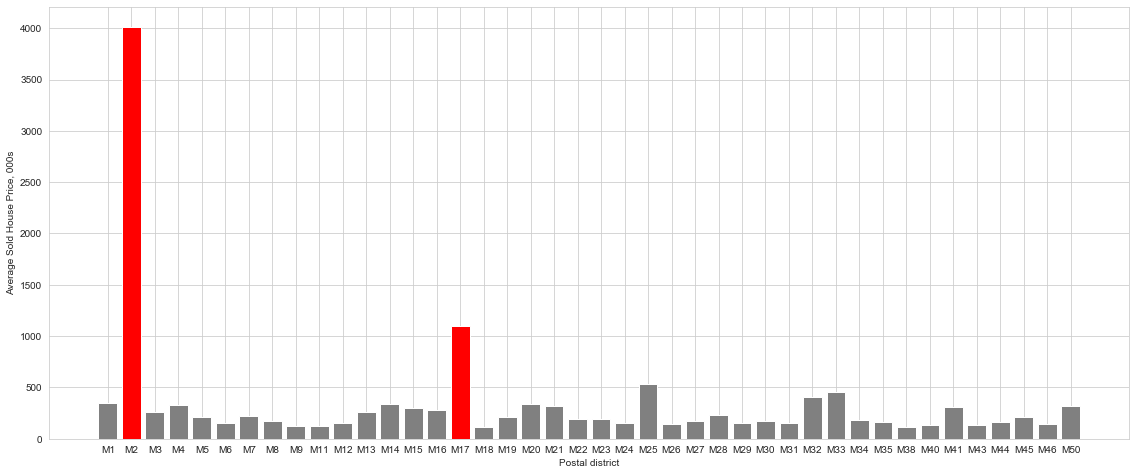

In [7]:
# Look at various housprices per neighbourhood to assess for anomalies

colours = ["gray"] * 42
colours[1] = "red"
colours[15] = "red"

fig = plt.figure()
fig.set_size_inches(15, 6)
ax = fig.add_axes([0,0,1,1])
x = df_man["Postal district"]
y = df_man["Average Sold House Price, 000s"]
plt.xlabel('Postal district')
plt.ylabel('Average Sold House Price, 000s')
ax.bar(x,y,color=colours)
plt.show()

M2 can be seen to be a clear outlier in terms of house pricing.

Further investigation into the data shows that only 3 properties have been sold in this region, depending on the properties sold this may have hugely distorted the data.  As the final region gementation will not be based on house price this can be left in and treated with caution.  For future reference the sold house price table should be updated to allow for a more realistic figure to be reached.

In [8]:
# Manchester geo-graphical co-ordinates sourced via Google search

M_lat = 53.4808
M_long = -2.2426

In [9]:
# import folium library

# !conda install -c conda-forge folium=0.5.0 --yes

import folium

In [81]:
map_manchester = folium.Map(location=[M_lat, M_long], zoom_start=11)

# add markers to map to show Manchester Neighbourhoods

for lat, lng, label in zip(df_man['Latitude'], df_man['Longitude'], df_man['Postal district']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manchester)  
    
map_manchester

In [82]:
# set up foursquare credentials

CLIENT_ID = 'SI2RHYA0X2H4CZ3YY3W3AY45XOPDO1PMQJVG4DYG1XZ5S5RJ'
CLIENT_SECRET = 'EM0ILNHQVOZWEEOVVTCLJPXK2YALPZJYNG4G3UQEFEPBDQRE'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SI2RHYA0X2H4CZ3YY3W3AY45XOPDO1PMQJVG4DYG1XZ5S5RJ
CLIENT_SECRET:EM0ILNHQVOZWEEOVVTCLJPXK2YALPZJYNG4G3UQEFEPBDQRE


In [83]:
# import additional required libraries
# use tutorial defined function to obtain to deifne nearby venues to Manchester neighbourhoods

import requests
from pandas.io.json import json_normalize

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal district', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [99]:
# set limit and radius for the foursquare venue search and generate venues

LIMIT = 100

radius = 1000

Manchester_venues = getNearbyVenues(names=df_man['Postal district'],
                                   latitudes=df_man['Latitude'],
                                   longitudes=df_man['Longitude']
                                  )

M1
M2
M3
M4
M5
M6
M7
M8
M9
M11
M12
M13
M14
M15
M16
M17
M18
M19
M20
M21
M22
M23
M24
M25
M26
M27
M28
M29
M30
M31
M32
M33
M34
M35
M38
M40
M41
M43
M44
M45
M46
M50


In [100]:
# set up one hot encoding to generate binary form venue data at each neighbourhood

Manchester_onehot = pd.get_dummies(Manchester_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbuorhood column back to dataframe
Manchester_onehot['Postal district'] = Manchester_venues['Postal district'] 

# move neighbourhood column to the first column
fixed_columns = [Manchester_onehot.columns[-1]] + list(Manchester_onehot.columns[:-1])
Manchester_onehot = Manchester_onehot[fixed_columns]

print(Manchester_onehot.shape)
Manchester_onehot.head()

(553, 137)


,Postal district,Adult Boutique,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Auto Garage,Bagel Shop,Bakery,...,Thai Restaurant,Theater,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio
0,M1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
Manchester_onehot["Postal district"].value_counts()

M1     100
M2     100
M3      63
M4      54
M33     20
M21     19
M34     13
M15     13
M20     11
M46     10
M27     10
M8       9
M14      9
M18      8
M24      7
M30      7
M44      7
M26      6
M16      5
M45      5
M25      5
M7       5
M13      5
M9       5
M41      4
M43      4
M31      4
M32      4
M50      4
M22      4
M40      4
M5       4
M23      4
M35      4
M19      4
M28      3
M11      2
M29      2
M38      2
M17      2
M6       1
M12      1
Name: Postal district, dtype: int64

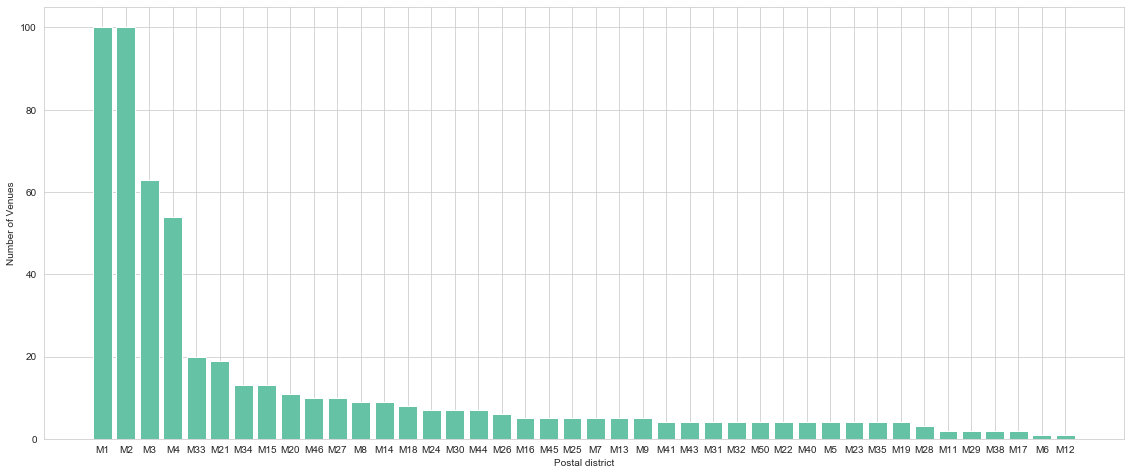

In [114]:
value_counts = pd.DataFrame(data = Manchester_onehot["Postal district"].value_counts())

fig = plt.figure()
fig.set_size_inches(15, 6)
ax = fig.add_axes([0,0,1,1])
x = value_counts.index
y = value_counts["Postal district"]
plt.xlabel('Postal district')
plt.ylabel('Number of Venues')
ax.bar(x,y)
plt.show()

In [115]:
# group data to generate relative venue numbers at each neighbourhood

Manchester_grouped = Manchester_onehot.groupby('Postal district').mean().reset_index()
Manchester_grouped.head()

,Postal district,Adult Boutique,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Auto Garage,Bagel Shop,Bakery,...,Thai Restaurant,Theater,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio
0,M1,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.02,...,0.02,0.01,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0
1,M11,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.50,...,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,M12,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,M13,0.00,0.0,0.00,0.0,0.2,0.0,0.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,M14,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [116]:
# report each neighbourhood by it's top 5 venues

num_top_venues = 5

for hood in Manchester_grouped['Postal district']:
    print("----"+hood+"----")
    temp = Manchester_grouped[Manchester_grouped['Postal district'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
        
    return row_categories_sorted.index.values[0:num_top_venues]


indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal district']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Postal district'] = Manchester_grouped['Postal district']

for ind in np.arange(Manchester_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Manchester_grouped.iloc[ind, :], num_top_venues)

----M1----
----M11----
----M12----
----M13----
----M14----
----M15----
----M16----
----M17----
----M18----
----M19----
----M2----
----M20----
----M21----
----M22----
----M23----
----M24----
----M25----
----M26----
----M27----
----M28----
----M29----
----M3----
----M30----
----M31----
----M32----
----M33----
----M34----
----M35----
----M38----
----M4----
----M40----
----M41----
----M43----
----M44----
----M45----
----M46----
----M5----
----M50----
----M6----
----M7----
----M8----
----M9----


Clustering algorithm now to be run on the data in an attempt to segment the neighbourhoods based on their top venues.  K-means clustering technique is chosen with a looped code set up to optimise the number of clusters used in the method using the standard elbow technique.

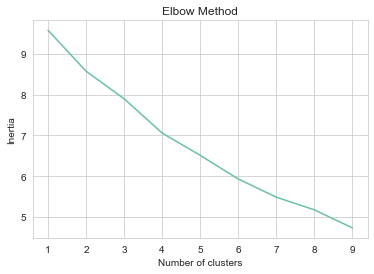

In [117]:
# loop function set up to identify the inertia of the final cluster designations against the number of clusters chosen

from sklearn.cluster import KMeans

Manchester_grouped_clustering = Manchester_grouped.drop('Postal district', 1)

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(Manchester_grouped_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Distinct elbow not really found in the data, looks to be a gradient change in the curve 6 clusters.  Decision taken to use 6 clusters to try and further segment the districts within the city.

In [118]:
# run k-means clustering
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Manchester_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 0, 0, 0, 0, 2, 0, 0])

In [119]:
# add clustering labels to dataframe

neighbourhoods_venues_sorted.insert(0, 'Cluster_Label', kmeans.labels_)

Man_merged = df_man

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood

Man_merged = Man_merged.join(neighbourhoods_venues_sorted.set_index('Postal district'), on='Postal district')

# neighbourhoods with errors dropped from dataset
Man_merged.dropna(inplace = True)

Man_merged.Cluster_Label = Man_merged.Cluster_Label.astype(int)

Man_merged

,Postal district,Neighbourhood,Local authority,Latitude,Longitude,"Average Sold House Price, 000s",Cluster_Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M1,Manchester central,Manchester,53.4773,-2.2351,346,0,Gay Bar,Hotel,Bar,Pub,Coffee Shop
1,M2,Manchester central,Manchester,53.4800,-2.2426,4008,0,Gay Bar,Coffee Shop,Hotel,Bar,Pub
2,M3,"Manchester central, Salford Quays",Manchester,53.4836,-2.2502,263,0,Bar,Coffee Shop,Pub,Indian Restaurant,Restaurant
3,M4,Manchester central,Manchester,53.4846,-2.2291,328,0,Coffee Shop,Bar,Pub,Tea Room,Beer Bar
4,M5,"Seedley, Weaste",Salford,53.4790,-2.2848,217,0,Indian Restaurant,Pizza Place,Food Truck,Brewery,Cosmetics Shop
5,M6,"Claremont, Irlams O' Th' Height",Salford,53.4916,-2.2970,158,3,Supermarket,Yoga Studio,Dive Bar,Escape Room,English Restaurant
6,M7,"Higher Broughton, Cheetwood","Salford, Manchester",53.5052,-2.2609,218,3,Bakery,Pizza Place,Pub,Supermarket,River
7,M8,"Crumpsall, Cheetham Hill",Manchester,53.5088,-2.2383,174,0,Light Rail Station,Asian Restaurant,Burger Joint,Park,Tram Station
8,M9,"Harpurhey, Blackley",Manchester,53.5214,-2.2127,122,0,Pub,Hotel,Furniture / Home Store,Park,Bar
9,M11,"Clayton, Openshaw",Manchester,53.4783,-2.1793,122,2,Bakery,Indian Restaurant,Dive Bar,Ethiopian Restaurant,Escape Room


In [120]:
# create map demonstrating neighbourhood clusters

import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[M_lat, M_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
rainbow = ["red","orange","green","blue"]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Man_merged['Latitude'], Man_merged['Longitude'], Man_merged['Postal district'], Man_merged['Cluster_Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Couple of treding patterns seen in the clusters.  Cluster 3 is seen more frequently around the centre of the city, while cluster 1 looks to be more frequent in the suburbs around the outskirts of the city.

Each cluster is also split out into it's own list to analysis and comment in the final report

In [124]:
# Tidying up final table to report none for locations that don't have 5 venue types for the final reported data
# Not an efficient way to do this and happy to hear advice if anyone hany suggestions for a more elegant solution

Man_merged.loc[10,"5th Most Common Venue"]="None"
Man_merged.loc[10,"4th Most Common Venue"]="None"
Man_merged.loc[10,"3rd Most Common Venue"]="None"
Man_merged.loc[10,"2nd Most Common Venue"]="None"
Man_merged.loc[5,"5th Most Common Venue"]="None"
Man_merged.loc[5,"4th Most Common Venue"]="None"
Man_merged.loc[5,"3rd Most Common Venue"]="None"
Man_merged.loc[5,"2nd Most Common Venue"]="None"
Man_merged.loc[15,"5th Most Common Venue"]="None"
Man_merged.loc[15,"4th Most Common Venue"]="None"
Man_merged.loc[15,"3rd Most Common Venue"]="None"
Man_merged.loc[34,"5th Most Common Venue"]="None"
Man_merged.loc[34,"4th Most Common Venue"]="None"
Man_merged.loc[34,"3rd Most Common Venue"]="None"
Man_merged.loc[27,"5th Most Common Venue"]="None"
Man_merged.loc[27,"4th Most Common Venue"]="None"
Man_merged.loc[27,"3rd Most Common Venue"]="None"
Man_merged.loc[9,"5th Most Common Venue"]="None"
Man_merged.loc[9,"4th Most Common Venue"]="None"
Man_merged.loc[9,"3rd Most Common Venue"]="None"
Man_merged.loc[26,"5th Most Common Venue"]="None"
Man_merged.loc[26,"4th Most Common Venue"]="None"
Man_merged.loc[17,"5th Most Common Venue"]="None"
Man_merged.loc[33,"5th Most Common Venue"]="None"
Man_merged.loc[21,"5th Most Common Venue"]="None"
Man_merged.loc[4,"5th Most Common Venue"]="None"
Man_merged.loc[35,"5th Most Common Venue"]="None"
Man_merged.loc[20,"5th Most Common Venue"]="None"
Man_merged.loc[41,"5th Most Common Venue"]="None"
Man_merged.loc[30,"5th Most Common Venue"]="None"
Man_merged.loc[29,"5th Most Common Venue"]="None"
Man_merged.loc[37,"5th Most Common Venue"]="None"
Man_merged.loc[36,"5th Most Common Venue"]="None"

In [125]:
cluster_1 = Man_merged.loc[Man_merged['Cluster_Label'] == 0]
cluster_1

,Postal district,Neighbourhood,Local authority,Latitude,Longitude,"Average Sold House Price, 000s",Cluster_Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M1,Manchester central,Manchester,53.4773,-2.2351,346,0,Gay Bar,Hotel,Bar,Pub,Coffee Shop
1,M2,Manchester central,Manchester,53.4800,-2.2426,4008,0,Gay Bar,Coffee Shop,Hotel,Bar,Pub
2,M3,"Manchester central, Salford Quays",Manchester,53.4836,-2.2502,263,0,Bar,Coffee Shop,Pub,Indian Restaurant,Restaurant
3,M4,Manchester central,Manchester,53.4846,-2.2291,328,0,Coffee Shop,Bar,Pub,Tea Room,Beer Bar
4,M5,"Seedley, Weaste",Salford,53.4790,-2.2848,217,0,Indian Restaurant,Pizza Place,Food Truck,Brewery,None
7,M8,"Crumpsall, Cheetham Hill",Manchester,53.5088,-2.2383,174,0,Light Rail Station,Asian Restaurant,Burger Joint,Park,Tram Station
8,M9,"Harpurhey, Blackley",Manchester,53.5214,-2.2127,122,0,Pub,Hotel,Furniture / Home Store,Park,Bar
11,M13,Longsight,Manchester,53.4603,-2.2139,264,0,College Cafeteria,Asian Restaurant,Hookah Bar,Indian Restaurant,Sports Club
12,M14,"Fallowfield, Moss Side, Ladybarn, Rusholme",Manchester,53.4477,-2.2244,341,0,Gym / Fitness Center,Bus Station,Coffee Shop,Fried Chicken Joint,Bed & Breakfast
13,M15,"Hulme, Manchester Science Park",Manchester,53.4656,-2.2501,297,0,Grocery Store,Café,Discount Store,Park,Garden Center


In [126]:
cluster_2 = Man_merged.loc[Man_merged['Cluster_Label'] == 1]
cluster_2

,Postal district,Neighbourhood,Local authority,Latitude,Longitude,"Average Sold House Price, 000s",Cluster_Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,M12,"Ardwick, Longsight",Manchester,53.4648,-2.2019,151,1,Gaming Cafe,None,None,None,None


In [127]:
cluster_3 = Man_merged.loc[Man_merged['Cluster_Label'] == 2]
cluster_3

,Postal district,Neighbourhood,Local authority,Latitude,Longitude,"Average Sold House Price, 000s",Cluster_Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,M11,"Clayton, Openshaw",Manchester,53.4783,-2.1793,122,2,Bakery,Indian Restaurant,None,None,None
15,M17,"Trafford Park, The Trafford Centre",Trafford,53.4691,-2.3179,1100,2,Bakery,Sandwich Place,None,None,None
39,M45,Whitefield,Bury,53.5473,-2.2883,217,2,Indian Restaurant,Pub,Bridal Shop,Bakery,Deli / Bodega


In [128]:
cluster_4 = Man_merged.loc[Man_merged['Cluster_Label'] == 3]
cluster_4

,Postal district,Neighbourhood,Local authority,Latitude,Longitude,"Average Sold House Price, 000s",Cluster_Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,M6,"Claremont, Irlams O' Th' Height",Salford,53.4916,-2.2970,158,3,Supermarket,None,None,None,None
6,M7,"Higher Broughton, Cheetwood","Salford, Manchester",53.5052,-2.2609,218,3,Bakery,Pizza Place,Pub,Supermarket,River
25,M27,"Swinton, Clifton, Pendlebury, Wardley",Salford,53.5122,-2.3363,173,3,Supermarket,Pizza Place,Park,Discount Store,Clothing Store
37,M43,Droylsden,Tameside,53.4838,-2.1477,137,3,Discount Store,Supermarket,Pharmacy,Soccer Stadium,None
38,M44,"Irlam, Cadishead",Trafford,53.4409,-2.4261,159,3,Supermarket,Gym,Warehouse Store,Gas Station,Optical Shop
